Priyadarshini Raghavendra 
praghave
UB Person number: 50495141

## Kaggle problem starement

Develop a machine learning program to identify when an article might be fake news.


### Attributes
- Serial number (starting from 0)
- Title (about the text news heading)
- Text (about the news content)
- Label
    - 0 = fake
    - 1 = real

## Import Modules

First, we import all necessary modules.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential
from sklearn.metrics import accuracy_score
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

## Load the dataset

Now, we load our dataset WELFake_dataset and check if it has been loaded by printing first few rows.

In [136]:
news = pd.read_csv('WELFake_dataset.csv')
news.head(20)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


To check the combination of title and text (which makes up the whle news), we add the title and text strings of the first row, and print it.

In [137]:
news['title'][0] + ' ' + news['text'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:3

## Data cleaning

Now, we proceed with cleaning the data, removing any other character other than string and converting it all to lowercase, so that a matrix can be created. First, we drop the unnecessary column Unnamed: 0.

In [138]:
# drop unnecessary columns
news = news.drop(columns=['Unnamed: 0'], axis=1)

Then, we check of there are any null-valued rows and drop them.

In [139]:
# drop null values
news = news.dropna(axis=0)
len(news)

71537

Just to check our previous operation, we use info() to see if any null values still persist.

In [140]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


Since there are no null values, we proceed with formatting the text. First, we combine the heading (title) and the text in a new column 'content'. This column will be used moving forward. We convert the entire text to lowercase and replace any special character with empty character.

In [141]:
# remove punctuations and other special characters
news['content'] = news['title'] + ' ' + news['text']
news['content'] = news['content'].str.lower()
news['content'] = news['content'].str.replace('[^A-Za-z0-9\s]', '')
news['content'] = news['content'].str.replace('\n', '')
news['content'] = news['content'].str.replace('\s+', ' ')

We finally print the clean version of 'content' column.

In [142]:
news['content']

0        law enforcement on high alert following threat...
2        unbelievable obamas attorney general says most...
3        bobby jindal raised hindu uses story of christ...
4        satan 2 russia unvelis an image of its terrify...
5        about time christian group sues amazon and spl...
                               ...                        
72129    russians steal research on trump in hack of us...
72130     watch giuliani demands that democrats apologi...
72131    migrants refuse to leave train at refugee camp...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton for pre...
Name: content, Length: 71537, dtype: object

Now, we focus on removing filler words (stop words) by using stopwords imported from nltk.corpus from all columns. A lamda function is used to split, remove and join the words again. The 'content' column is now ready to be used for embedding.

In [143]:
# remove stopwords
stop_words = stopwords.words('english')
news['content'] = news['content'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
news.head(20)

,title,text,label,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert following threats c...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obamas attorney general says char...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu uses story christian...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan 2 russia unvelis image terrifying new su...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,time christian group sues amazon splc designat...
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,dr ben carson targeted irs never audit spoke n...
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,house intel chair trumprussia fake story evide...
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,sports bar owner bans nfl gameswill show true ...
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,latest pipeline leak underscores dangers dakot...
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,gop senator smacked punchable altright nazi in...


## Exploratory Data Analysis (EDA)

Before we proceed with embedding, we visually represent the frequency of the words in the filtered 'content' column using WordCloud; where the most frequent words are highlighted. This section is for all the news data - fake and real.

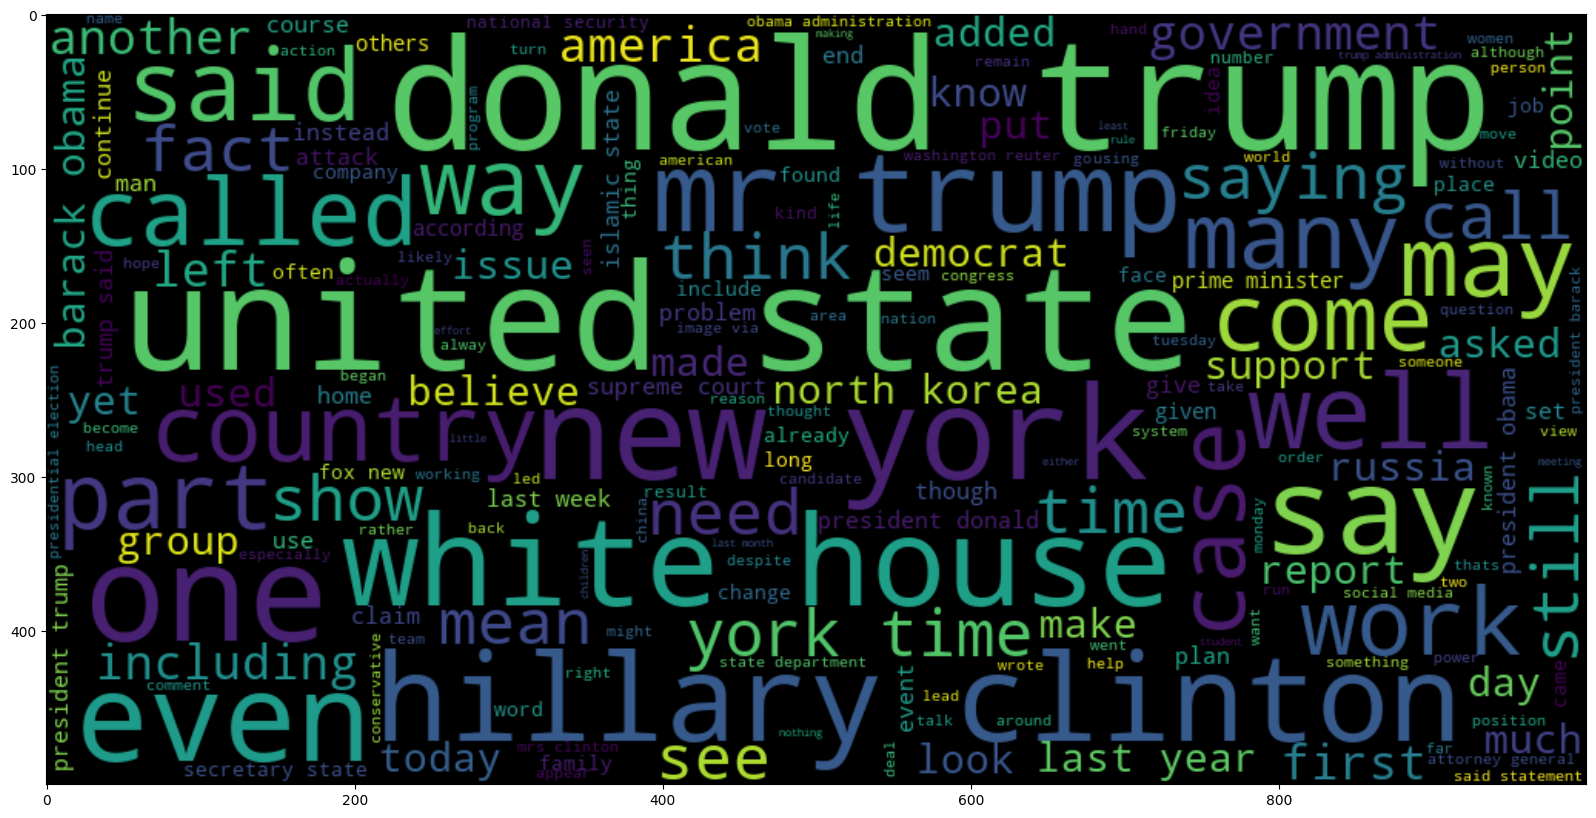

In [144]:
words = " ".join([sentence for sentence in news['content']])

word_cloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

Here, we visually represent the words from news which are real.

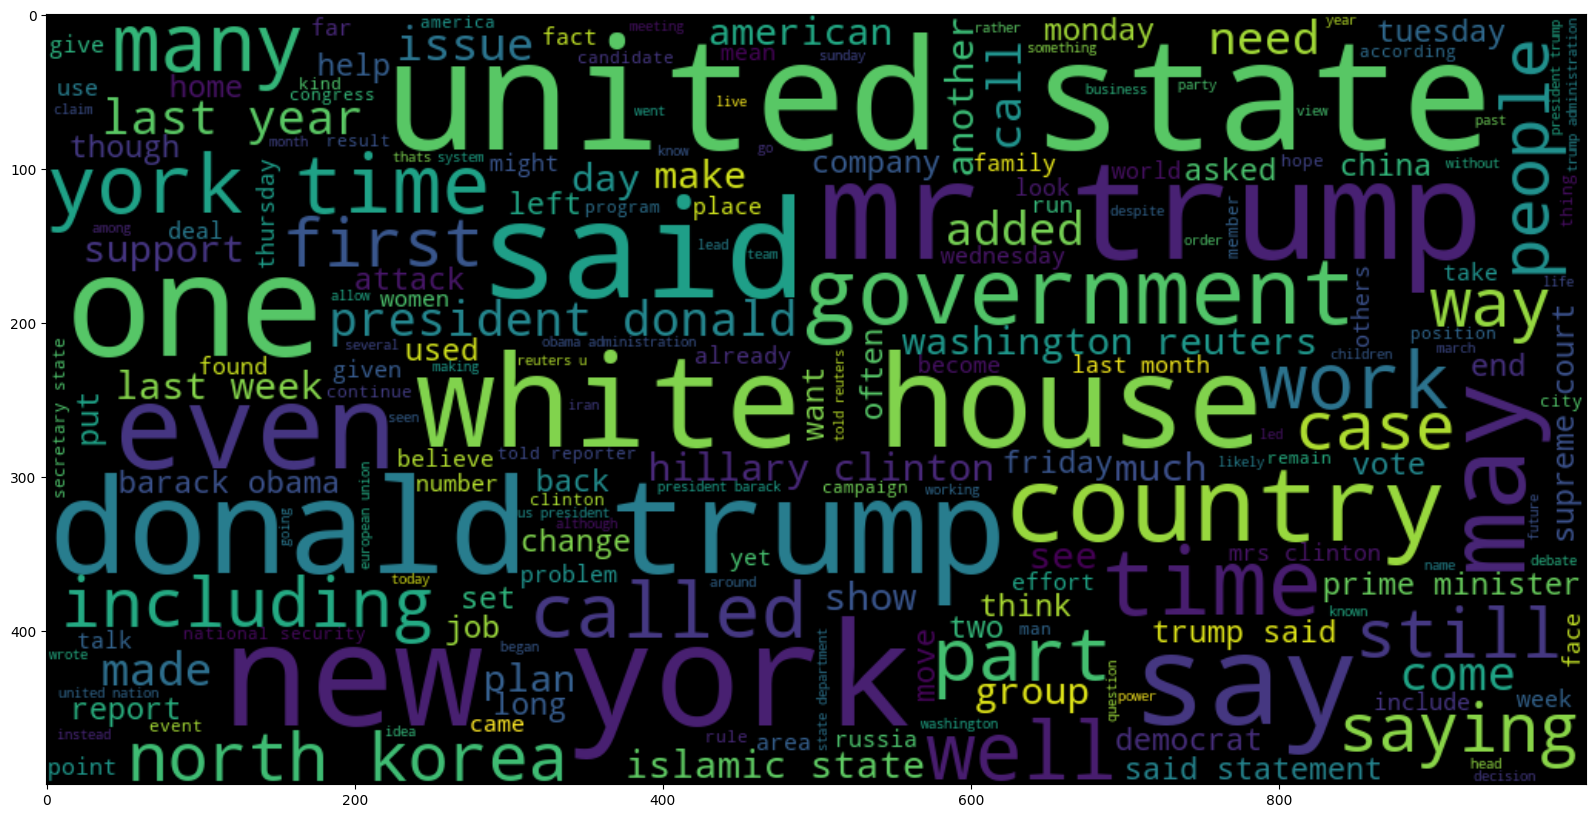

In [145]:
words = " ".join([sentence for sentence in news['content'][news['label']==0]])

word_cloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

Here, we visually represent the words from news which are fake.

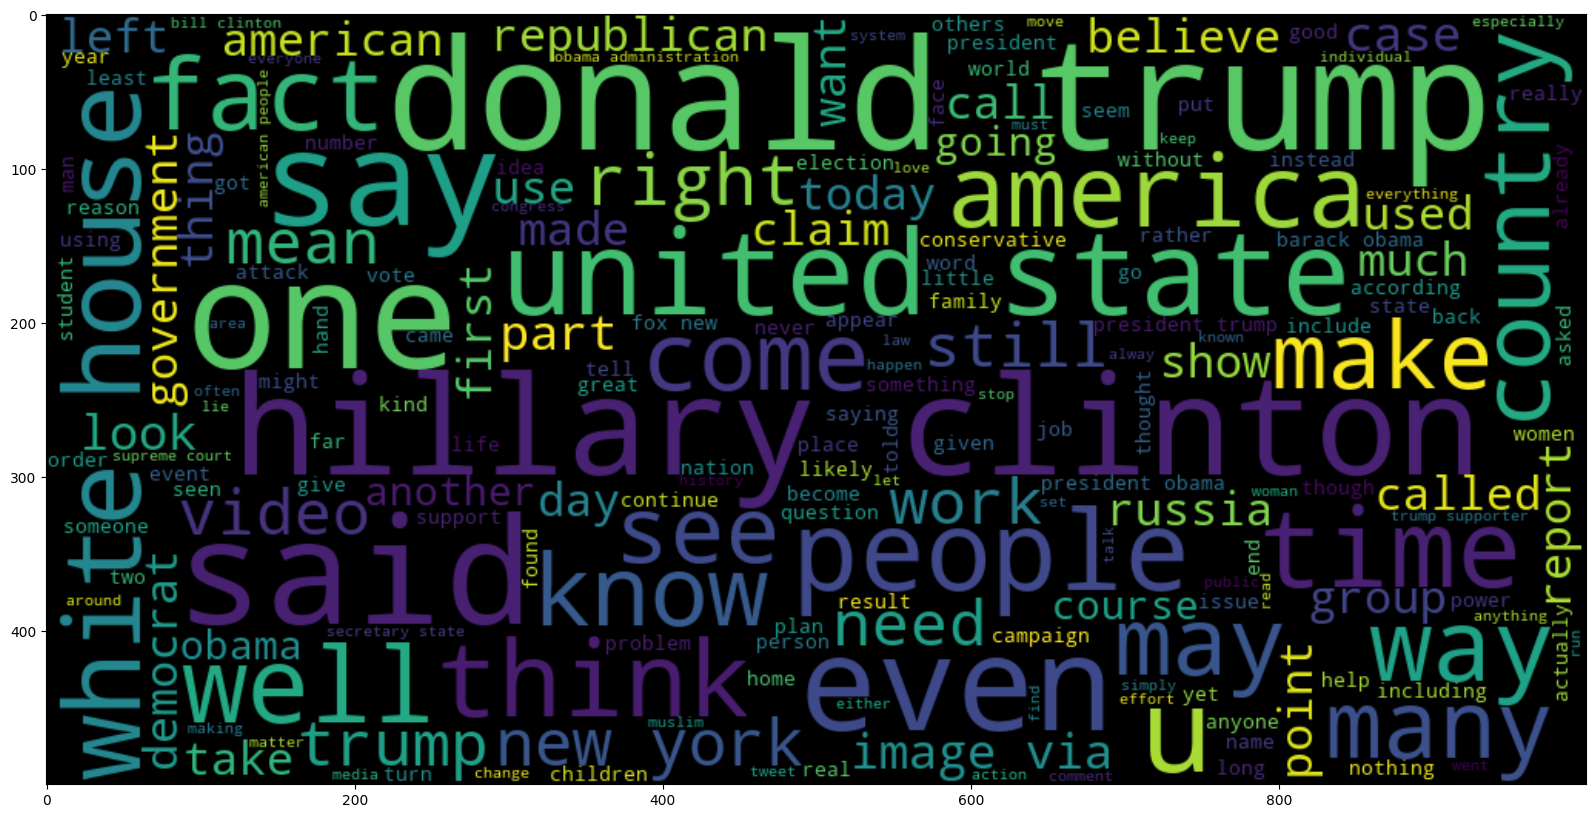

In [146]:
words = " ".join([sentence for sentence in news['content'][news['label']==1]])

word_cloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

## Word Embedding

Here, we use Tokenizer() from Keras package to preprocess the text data from 'content' column. The objective of word embedding is to convert the textual data into numerical sequences.

First we initialize the Tokenizer(), then we fit it on our 'content' column, building a dictionary with unique indices for each and every word. Then we calculate the size of the dictionary and display it. 

In [147]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news['content'])
word_index = tokenizer.word_index
vocab_length = len(word_index)
vocab_length

402846

The tokenizer then converts the fitted text into sequence of integers. This sequence is then padded, so that all arrays are of the same size; as different sized arrays are difficult to work on. Here, post padding is used.

In [148]:
sequences = tokenizer.texts_to_sequences(news['content'])
padded_seq = pad_sequences(sequences, maxlen=250, padding='post', truncating='post')
padded_seq.shape

(71537, 250)

An embedding index is created by reading and parsing pre-trained word embeddings from GloVe (Global Vectors for Word Representation) file. The first word is the actual word, which is stored in 'word'; the rest of the string, which is the matrix representation of the word is stored in word_matrix_rep.
Therefore, embedding_index becomes a dictionary that stores a word with its matrix representation.

In [149]:
embedding_index = {}
with open('archive/glove.6B.100d.txt', encoding='utf-8') as file:
    for line in file:
        file_content = line.split()
        word = file_content[0]
        
        word_matrix_rep = np.asarray(file_content[1:], dtype='float32')
        embedding_index[word] = word_matrix_rep

Now, we create the same matrix for our data.

We first initialize embedding_matrix with zeros. We now retrieve word embeddings from the already created embedding_index. A new matrix embedding_matrix is created that has word embeddings of our data, in the form of a dictionary.

In [150]:
embedding_matrix = np.zeros((vocab_length+1, 100))
for word, i in word_index.items():
    embedding_array = embedding_index.get(word)
    if embedding_array is not None:
        embedding_matrix[i] = embedding_array

## Input Split

Now that we have all our textual data converted into a sequence of vectors, we proceed with training and testing. Complete dataset is divided into trainign and testing sets, following standard procedure.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(news['content'], news['label'], test_size=0.20, random_state=42, stratify=news['label'])
x_train

9140     watch jailed palestinian terrorist hunger stri...
65396    breaking white house abandons tpp ttip breakin...
19656    facebook says likely russianbased operation fu...
59765    texas committee passes bill curb transgender b...
45119    draft tim tebow effort ignites rumors hell run...
                               ...                        
51461    hillary clintons declining favorability number...
64811    uk interested strong energy sector stable intl...
48359    local reporter deep blue state stuns liberals ...
51202    drudge threatens hillaryhes drop bombshell sex...
36301    hillary reminded us last week lucky wasnt elec...
Name: content, Length: 57229, dtype: object

In [152]:
x_test

10957    huckabee nails says obamas radical list invite...
24326    breaking angry black lives matter activist adm...
12137    former marine guilty murder american sniper tr...
1283     new video destroys democrats obamacare lies na...
44994    black community early vote count clinton camp ...
                               ...                        
64387    nomi prins explains central bankers game thron...
63924    silent countercoup 17 intel agencies stop croo...
15254    two hawkish antiimmigration groups say consult...
45591    pentagon says revising rules trumps transgende...
46288    us lawmaker scalise improving baseball field s...
Name: content, Length: 14308, dtype: object

## Passive Aggressive Classifier

First, we use TFID vectorizer to create word embeddings of the text. Then we fit it using training data and transform it using test dataset.

In [153]:
#Setting up Term Frequency - Inverse Document Frequency Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 1.0)
# Fit and transform training set and transform test set
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
#tfidf_test_final = tfidf.transform(test['text'])

Now, using Passive Aggressive Classifier, model is fitted and predicted.

In [154]:
# Setting up Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter = 50)
# Fitting on the training set
pac.fit(tfidf_train, y_train)
# Predicting on the test set
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 96.89%


From the accuracy, we see that the model has performed quite well.

## Logistic Regression

Now, we explore other models, starting with a basic one: Logistic Regression, and check its accuracy.

In [155]:
model_logistic = LogisticRegression()
model_logistic.fit(tfidf_train, y_train)

#  training accuracy
X_train_prediction = model_logistic.predict(tfidf_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)


# test accuracy
X_test_prediction = model_logistic.predict(tfidf_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.9705219381781963
Accuracy score of the test data :  0.9562482527257479


We see that we got a test accuracy of 95%, which is very good. Further, we experiment with a few other models to see how they perform.

## Random Forest classification

Here, we use Random Forest classifier, as it utilizes an ensemble of decision trees to classify texttual data. 

How it works is, each tree is constructed by considering subsets of words and a random subset of training instances. The ultimate classification is done through a majority result across the trees.

In [157]:
clf_RFC = RandomForestClassifier(n_estimators=100)
clf_RFC.fit(tfidf_train, y_train)
y_pred_RFC = clf_RFC.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred_RFC)
accuracy

KeyboardInterrupt: 

From the result, we see that Random forest classifier has got an accuracy of 94%.

## Decision Tree classifier

Here, we use a Decision Tree classifier, which consists of a hierarchical structure of decision nodes to make sequential decisions based on the words, and assigns labels to each text. 

Unlike a Random Forest, which aggregates predictions from multiple independent decision trees, a single Decision Tree may be prone to overfitting. 

Let us see if the accuracy proves this theory right.

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(tfidf_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_DT = classifier.predict(tfidf_test)
score = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.79%


From the results, there is a miniscule difference in accuracy, with Decision Tree having a lower accurcy in comparision with Random Forest. This proves the theory almost right.

## Linear SVM

Further, we check accuracy with Linear Support Vector Machine.

In [ ]:
svc = LinearSVC()
svc.fit(tfidf_train, y_train)

LinearSVC()

In [ ]:
y_pred_SVC = svc.predict(tfidf_test)
score = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.05%


From the results, we see that the accuracy is the greatest, with 97%, which shows us that linear SVM has captured the complexities of this data effectively.

## LSTM Model Training

Now, we see how Long Short-Term Memory (LSTM) model works with our data.

LSTM classifier is a recurrent neural network (RNN) specifically for sequential data, to process and understand long-range dependencies in text sequences. Unlike the previously used classifiers such as Random Forest and Decision Trees, LSTMs are NN-based models that excel in capturing complex patterns in sequential data, especially for language modeling. 

Here is a sequential NN model using Keras containing 
1. embedding layer which has pre-trained word embeddings
2. dropout layers for regularization
3. LSTM layer for sequential data processing
4. two dense layers for classification. A sigmoid function is used in the end layer.

In [26]:
LSTM_model = Sequential([
    Embedding(vocab_length+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

Compilation of the model is done using binary crossentropy loss, the Adam optimizer, and accuracy is taken as the evaluation metric. 

In [27]:
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
LSTM_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         32564700  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32715229 (124.80 MB)
Trainable params: 15

Now, we train the LSTM model using validation data.

In [28]:
LSTM_fit = LSTM_model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10


224/224 [==============================] - 622s 3s/step - loss: 0.6021 - accuracy: 0.6684 - val_loss: 0.5723 - val_accuracy: 0.6877
Epoch 2/10
224/224 [==============================] - 542s 2s/step - loss: 0.6019 - accuracy: 0.6741 - val_loss: 0.5448 - val_accuracy: 0.7241
Epoch 3/10
224/224 [==============================] - 562s 3s/step - loss: 0.5540 - accuracy: 0.7173 - val_loss: 0.5577 - val_accuracy: 0.7136
Epoch 4/10
224/224 [==============================] - 515s 2s/step - loss: 0.5991 - accuracy: 0.6691 - val_loss: 0.6836 - val_accuracy: 0.5580
Epoch 5/10
224/224 [==============================] - 540s 2s/step - loss: 0.6252 - accuracy: 0.6424 - val_loss: 0.5344 - val_accuracy: 0.7571
Epoch 6/10
224/224 [==============================] - 437s 2s/step - loss: 0.4933 - accuracy: 0.7867 - val_loss: 0.4851 - val_accuracy: 0.7944
Epoch 7/10
224/224 [==============================] - 472s 2s/step - loss: 0.5839 - accuracy: 0.6813 - val_loss: 0.5623 - val_accuracy: 0.67

To visualize the training and validation performance of LSTM, we plot the results. 

The first plot displays training and validation accuracy, while the second one shows training and validation loss across different epochs.

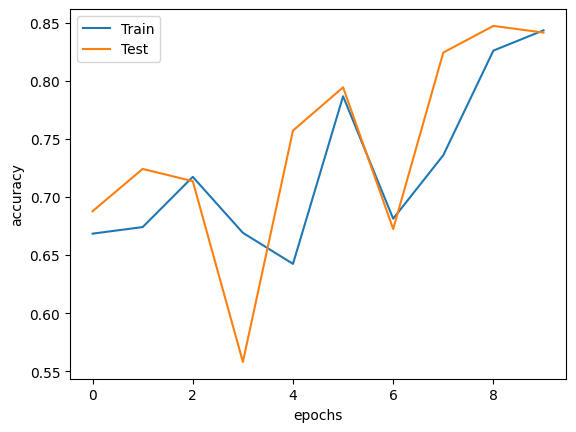

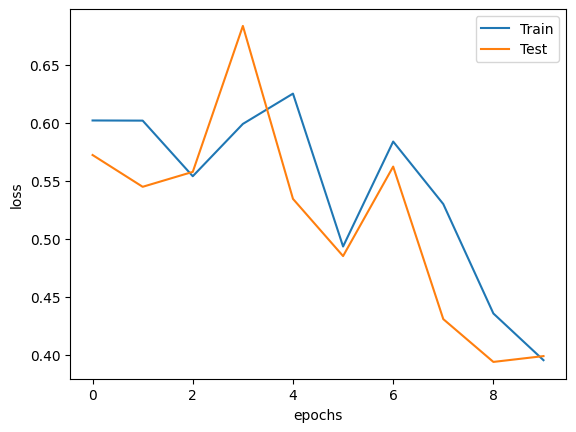

In [29]:
plt.plot(LSTM_fit.history['accuracy'])
plt.plot(LSTM_fit.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(LSTM_fit.history['loss'])
plt.plot(LSTM_fit.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

From the above plots, we see that the test loss has been significantly decreasing and test accuracy has increased to almost 84%.

## PREDICTION TESTING

Below section contains news from different dataset (unseen data) to check if our model is working fine.

A function for preprocessing the text is used to sequence and pad the textual data and use it for prediction.

A few contents from a different fake news dataset is picked to see if our Passive Aggressive Classifier model predicts fake news correctly.

In [129]:
real_news = ["Massachusetts Copâ€™s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter   Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. â€œWe woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,â€ she posted, according to the Boston Herald. â€œ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],â€ the now private Facebook account alleged. â€œToday on the other hand I have so much anger and hate that I donâ€™t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.â€ Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting â€œBLMâ€ on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didnâ€™t feel â€œquite rightâ€ and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. â€œIt was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,â€ he told CBS Boston . â€œWe came to the conclusion it was all fabricated. There was no intruder, there was no burglary.â€ The chief said the hoax was likely motivated by the coupleâ€™s financial troubles and that he has empathy for the family. â€œIâ€™m very familiar with her and itâ€™s an unfortunate set of circumstances that have taken place.â€ Dalyâ€™s neighbors said it wasnâ€™t a very smart thing to do for a woman who is married to a cop. â€œShe must have tagged the place herself,â€ said one neighbor. â€œI donâ€™t know why youâ€™d do that, if youâ€™re gonna stage a robbery, I mean really come on, youâ€™re a copâ€™s wife. You should know better.â€ In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Dalyâ€™s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."]
fake_new_data = ["The BBC produced spoof on the â€œReal Housewivesâ€ TV programmes, which has a comedic Islamic State twist, has been criticised by Leftists and Muslims who claim the sketch is offensive. [The BBC released the trailer earlier this week and were immediately slammed by those on the left and Muslims who thought that making fun of the brides of members of the terror group was out of the bounds of conventional humour. The sketch is part of a new programme called â€œRevoltingâ€ written by Jolyon Rubinstein and Heydon Prowse which, according to the BBC, is â€œsatirising the state of the nation. â€  LOLOLOL pic. twitter.   â€”   Raheem Kassam (@RaheemKassam) January 4, 2017,  The BBC2 Facebook page was inundated with criticism. One user wrote, â€œIâ€™m mortified that the BBC had produced such a programme. This is simply bad taste. The fact it is a comedy makes it even more worrying that humour should be associated with the actions of ISIS. Is this really what TV licenses are funding! ?â€ Others took a different point of view including a Muslim saying, â€œAs a Muslim I find this HILARIOUS! Brilliant! The satire is on point highlighting the pathetic ideals of a pathetic group like ISIS. â€ Not all Muslims agreed with the sentiment and users on Twitter expressed just as much outrage for the sketch. One man, a Bangladeshi, said â€œThe BBC really made a satirical show called â€˜The Real Housewives of ISISâ€™ while the real housewives of ISIS are being raped and abused daily. â€   The BBC really made a satirical show called â€The Real Housewives of ISISâ€ while the real housewives of ISIS are being raped and abused daily,  â€”   Meraj. (@UncleMeraj) January 4, 2017,  Another wrote, â€œâ€˜Real Housewives of ISISâ€™ will make Hijabis feel more isolated n targeted by Islamophobes. Thanks @BBC for adding to the negative stereotype. â€ â€™Real Housewives of ISISâ€™ will make Hijabis feel more isolated n targeted by Islamophobes. Thanks @BBC for adding to the negative stereotype,  â€”   aÑ•Ð½ (@AshKaneSkittles) January 4, 2017,  Leftists also articulated how offended they were that the public broadcaster would dare create such a sketch mocking Islamic State. Some questioned whether the use of taxpayer money via the TV license fee should go toward the funding of the programme. As if peopleâ€™s TV license in this country is going towards funding the production of a programme called â€the real housewives of ISISâ€. Wow,  â€”   Cameron Edgar (@CammyyyEdgar) January 4, 2017,    The video itself has already been viewed millions of times on Facebook and other social media platforms.  The clip shows several women in hijabs talking to each other in a    house taking selfies and showing off their suicide belts to each other. One woman even mentions that she hadnâ€™t come from Birmingham â€œto do thisâ€ as she scrubbed the floor of the home. Women joining Islamic State and travelling to Syria to become brides has become a real problem in European countries as the terror group promises young girls a more glamorous lifestyle. In 2014, eight schoolgirls from Bethnal Green travelled to Syria to become brides of Islamic State fighters, all of them under the age of 18."]

In [131]:
tfidf_testpred = tfidf.transform(real_news)

In [132]:
result =pac.predict(tfidf_testpred)[0]
if result ==1:
    print("Real news")
elif result ==0:
    print("Fake news")

Real news


In [133]:
tfidf_testpred = tfidf.transform(fake_new_data)

In [134]:
result =pac.predict(tfidf_testpred)[0]
if result ==1:
    print("Real news")
elif result ==0:
    print("Fake news")

Fake news


From the results, we can conclude that our model performance is effective in classifying if a given news is fake.